In [1]:
from image_ops import Dataset_Operations
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from clustering import k_means
data = np.load("debug_clean_baseline.npy")[:6000]

In [ ]:
def add_noise(images, snr):
    power_clean = (images**2).sum()/np.size(images)
    noise_var = power_clean/snr
    return images + np.sqrt(noise_var)*np.random.normal(0, 1, images.shape)

noisy_data = add_noise(data, 1/8)

In [ ]:
plt.imshow(data[0])

  0%|          | 0/40 [00:00<?, ?it/s]

[3173, 4299, 3286, 4219, 911, 3206, 5871, 3264, 5054, 4739, 5902, 3463, 4094, 57, 631, 3387, 4236, 3356, 5992, 1698, 4123, 5114, 3906, 5383, 2628, 4247, 758, 4508, 1348, 2107, 5485, 4025, 2677, 4522, 1813, 4714, 2136, 5920, 5389, 1824]
Clustering


100%|██████████| 40/40 [11:26<00:00, 16.86s/it]
0it [00:00, ?it/s]

Averaging


40it [00:03, 11.44it/s]


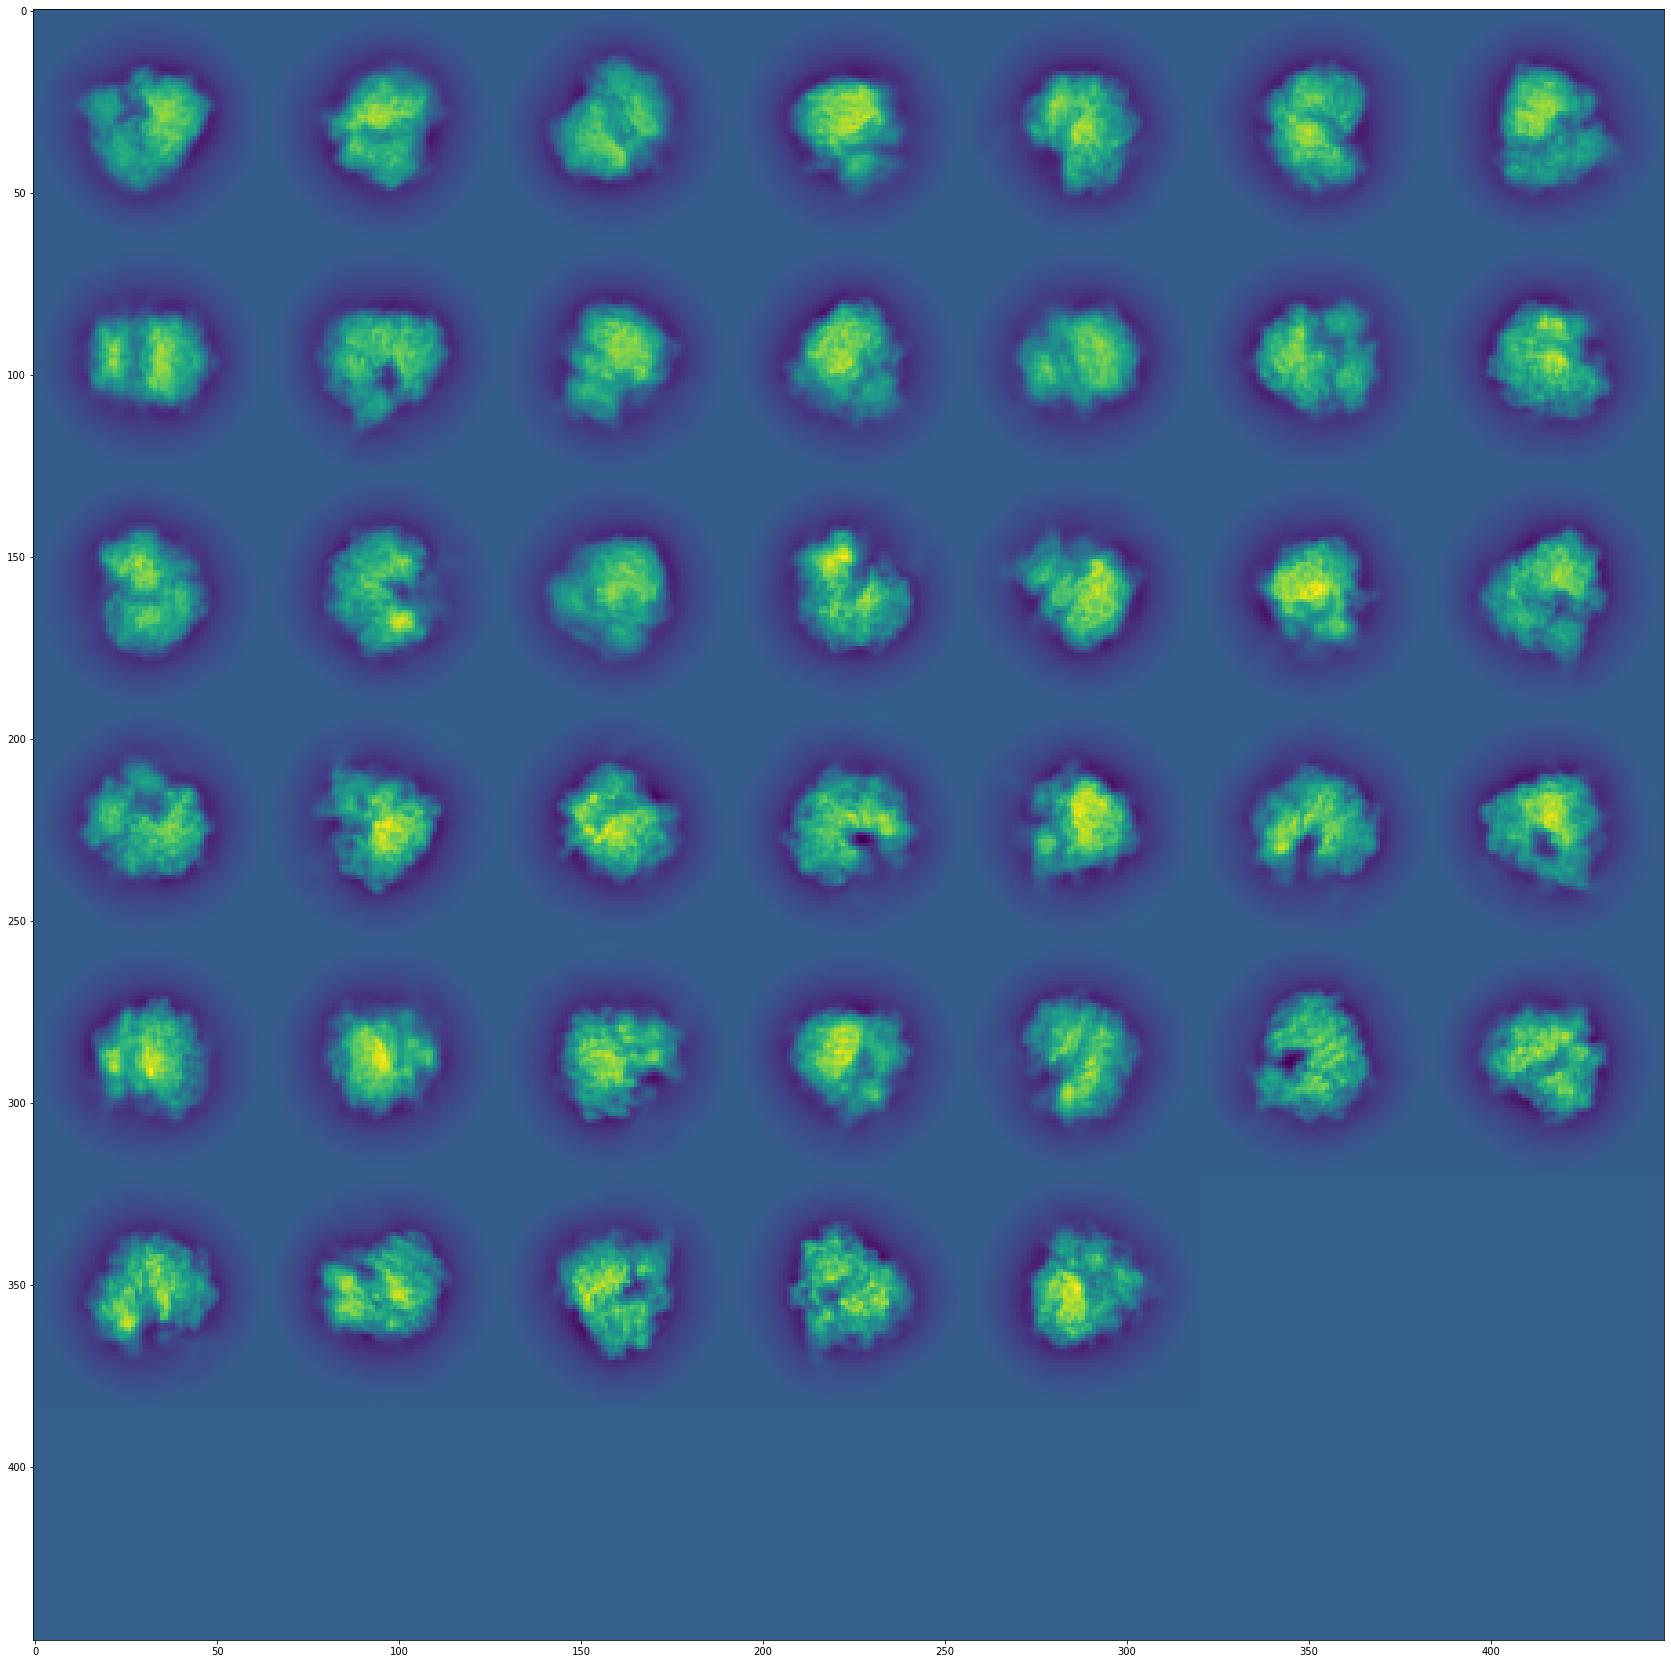

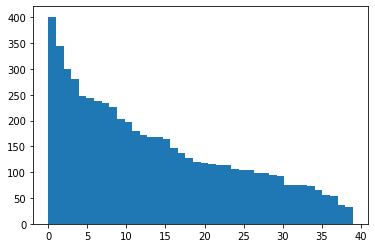

  0%|          | 0/40 [00:00<?, ?it/s]

Clustering


 78%|███████▊  | 31/40 [09:04<02:44, 18.30s/it]

KeyboardInterrupt: 

In [2]:
dataset = Dataset_Operations(data, metric='l2')
clustering = k_means(40, 100)
clustering.train(dataset, niter=3, init='k++')

In [ ]:
labels = clustering.labels
centers = clustering.centers
counts = dict()
for label in labels:
    counts[label] = counts[label] + 1 if label in counts else 1
counts = [(label, counts[label]) for label in counts]
center_counts = [(centers[int(label[0])], label[1]) for label in counts]
sorted_centers = sorted(center_counts, key=lambda x:x[1], reverse=True)
sorted_centers = [c[0] for c in sorted_centers]
fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(montage(np.array(sorted_centers)), vmin=-2, vmax=3)
plt.show()
counts = sorted(counts, key=lambda x:x[1], reverse=True)
sorted_labels = np.zeros(len(labels))
for i, entry in enumerate(counts):
    sorted_labels[labels == entry[0]] = i
labels = sorted_labels

plt.hist(labels, bins=60)
plt.show()

In [ ]:
from skimage.util import montage

In [ ]:
dataset2 = Dataset_Operations(data, metric='wemd', level=15)
clustering2 = k_means(40, 100)
clustering2.train(dataset, niter=3, init='k++')

In [ ]:
clustering2.view_centers()

In [ ]:
rotations = np.load("debug_angles.npy")[:6000]

def angle(R1, R2, mod=False):
    dot = R1.T[:,2].T @ R2.T[:,2]
    if np.abs(dot) > 1:
        dot = dot/ np.abs(dot)
    theta1 = np.arccos(dot)* (180/np.pi)
    dot = (-1*R1.T[:,2].T) @ R2.T[:,2]
    if np.abs(dot) > 1:
        dot = dot/ np.abs(dot)
    theta2 = np.arccos(dot)* (180/np.pi)
    if mod:
        return min(theta1, theta2)
    return theta1

def cluster_histogram(i, rotations, labels, mod=False):
    rots = rotations[labels == i]
    angles = []
    for i in range(len(rots)):
        for j in range(i+1, len(rots)):
            angles.append(angle(rots[i], rots[j], mod))
    return angles

def plot_histograms(hists):
    fig = plt.figure(figsize=(30,30))
    n = len(hists)
    cols = 7
    rows = np.ceil(n/7)
    for i, hist in enumerate(hists):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.hist(hist, bins=[i for i in range(180)])
    plt.show()
    
    
def ordered_plot(labels, histograms):
    counts = dict()
    for label in labels:
        counts[label] = counts[label] + 1 if label in counts else 1
    counts = [(label, counts[label]) for label in counts]
    hist_counts = [(histograms[int(label[0])], label[1]) for label in counts]
    sorted_hists = sorted(hist_counts, key=lambda x:x[1], reverse=True)
    sorted_hists = [h[0] for h in sorted_hists]
    plot_histograms(sorted_hists)
        

l2_metrics = [cluster_histogram(i, rotations, clustering.labels) for i in range(60)]

emd_metrics = [cluster_histogram(i, rotations, clustering2.labels) for i in range(40)]

ordered_plot(clustering2.labels, emd_metrics)

ordered_plot(clustering.labels, l2_metrics)

